In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
train_path = '/content/drive/MyDrive/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/val'
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

# New Section

In [ ]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/chest_xray/train/*')
# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
163/163 [==============================] - 2857s 17s/step - loss: 0.2128 - accuracy: 0.9137 - val_loss: 0.2714 - val_accuracy: 0.9054
Epoch 2/5
163/163 [==============================] - 2807s 17s/step - loss: 0.1216 - accuracy: 0.9569 - val_loss: 0.2982 - val_accuracy: 0.9119
Epoch 3/5
163/163 [==============================] - 2802s 17s/step - loss: 0.1158 - accuracy: 0.9582 - val_loss: 0.2888 - val_accuracy: 0.9103
Epoch 4/5
163/163 [==============================] - 2797s 17s/step - loss: 0.0962 - accuracy: 0.9663 - val_loss: 0.2750 - val_accuracy: 0.9119
Epoch 5/5
163/163 [==============================] - 2793s 17s/step - loss: 0.0926 - accuracy: 0.9659 - val_loss: 0.2612 - val_accuracy: 0.9247


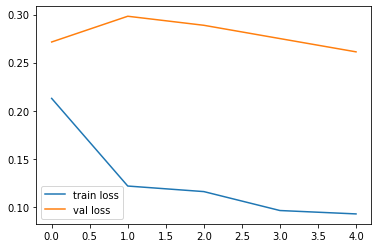

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

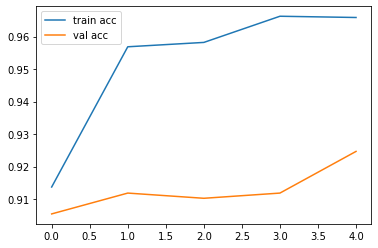

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model= load_model('/content/model_vgg16.h5')
img=image.load_img('/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg', target_size = (224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
import pandas as pd
df=pd.DataFrame(classes, columns=['Normal','Pneumonia'])
print(df)


   Normal  Pneumonia
0     0.0        1.0
